# Coin Flipping

***

In this notebook, you will learn about probability through flipping a coin.

## Prerequisites

***

You will need the following packages installed to run this notebook.

In [16]:
# For generating numbers.
import numpy as np

## Simulating a Coin Flip

***

The following code flips one coin, giving a 0 or a 1.

We can interpret a 1 as heads and a 0 as tails.

The 0.5 is the probability of getting a 1.

This means the coin is fair - a 50/50 chance of heads/tails.

<br>

Probabilities are numbers between 0 and 1, inclusive.

If an event happens with probability 0, it means it has no chance of happening.

A 1 means it will definitely happen.

A probability of 0.1 means a 10% chance, 0.2 means a 20% chance, and so on.

*Note: We will just use the `np.random.binomial()` function for now, ignoring what it might mean.*

In [2]:
# Flip a fair coin.
np.random.binomial(1, 0.5)

0

Note that every time we re-run this notebook we will get a new coin flip.

The result above is a 1 for me but might be a 0 for you.

That will happen throughout this notebook.

## Repeated Flips

***

A single coin flip is not very interesting.

How about we flip a fair coin 100 times?

We can supply a third parameter to the function, the 100.

In [3]:
# Flip a fair coin 100 times.
np.random.binomial(1, 0.5, 100)

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1])

The outcome of each flip is represented by a 0 or a 1.

While it is interesting to see each flip, sometimes we only want to know the total number of heads.

If we delete the third parameter - the 100 - and change the first to 100, here's what happens.

In [4]:
# Flip a fair coin 100 times, giving only the total nbumber of heads.
np.random.binomial(100, 0.5)

44

At the time of writing, the output above is 45.

Again, it might be (in fact, *probably* be) different for you.

Note that we have lost some detail having moved from a list of 0's and 1's to a single number representing the number of heads.

I do not know which 45 of the 100 coin flips came up heads.

It might have been the first 45, for all I know, with the last 55 coming up tails.

Indeed the probability of that is the same as the probability of any other sequence of 45 1's and 55 0's.

A lot of probability focuses on the relationship between actual events - seeing the list of underlying outcomes - and summaries of the events - seeing only the total number of heads, for instance.

## Twice 50/50

***

One hundred coin flips is lot - we will reduce it to ten coin flips for simplicity.

Sometimes when we ask numpy to flip ten coins, we'll get five heads.

The following code repeatedly flips 10 coins and prints of the first three times we get 5 heads.

In [5]:
# Keep flipping coins until we get three examples of getting five heads in ten coin tosses.

# Number of examples.
N = 3

# Keep trying until we get three examples.
while N > 0:
    # Toss 10 coins.
    tosses = np.random.binomial(1, 0.5, 10)
    # Check if we got five heads.
    if tosses.sum() == 5:
        # If we got 5 heads, print the list of heads/tails.
        print(tosses)
        # Reduce the number of examples left ot find by 1.
        N = N - 1

[0 0 0 1 0 1 1 1 1 0]
[0 1 1 0 0 1 0 0 1 1]
[0 0 1 1 1 0 0 1 1 0]


Listed above are three examples of ten fair coins being flipped.

Each 1 represents a head and each 0 a tail.

The three lists of ten 0's and 1's might be identical, but it is far more likely that at least one of them is different.

Indeed, it is most likely that all three are different from each other.

Here is what the output looks like for me at the time of writing.

```
[1 0 0 0 1 1 1 0 0 1]
[1 1 0 1 1 1 0 0 0 0]
[1 1 1 0 0 1 0 0 1 0]
```

The first coin flip in each list came up heads - the three 1's at the start of each line.

However, the second coin flip came up tails in the first example and heads in the other two examples.

Likewise, the third coin flip can up tails for the first and second examples and heads for the third.

They are all different but share a common property: there are five 1's, or five heads, in each set of ten coin flips.

How many other ways are there to flip ten coins and get five heads?

## Counting Heads

***

We could get numpy to keep flipping ten coins, tracking each time it gets five heads.

Eventually we would likely get all the possibilities, although we would also likely get some duplicates.

But how would we know when to stop flipping coins?

How would we know we had them all?

It would be better to have an *analytical* method for counting the number of possibilities - based on logic, on deduction.

I will try to convince you that the following calculation gives the number of possibilities.

In [6]:
(10 * 9 * 8 * 7 * 6) / (5 * 4 * 3 * 2 * 1)

252.0

This is a calculation involving the number 1 to 10, multiplication represented by the symbol `*` and division using the symbol `/`.

The parentheses here are just for grouping terms together to specify that the eight multiplications should happen before the single division.

*Note: technically we should use `//` here instead of `/` in Python. The first divides integers, the second real numbers. We won't worry about that, though.*

Let us look first at the first part of the calculation, `10 * 9 * 8 * 7 * 6`.

This says multiply 10 by 9, then that by 8, then by 7, and finally by 6.

That's quite a big number.

In [7]:
10 * 9 * 8 * 7 * 6

30240

Here is the logic behind that part of the calculation.

We start out to flip ten coins, so let's put ten placeholders (`_`) for the ten outcomes.

`_` `_` `_` `_` `_` `_` `_` `_` `_` `_`

Once we start flipping coins, each of the ten 0's or 1's generated will go in each placeholder in turn.

Suppose we flip the first coin and get a head.

Then the placeholders look like this:

`1` `_` `_` `_` `_` `_` `_` `_` `_` `_`

Okay, so let's reset the placeholders and think about the different places we can put 1's.

`_` `_` `_` `_` `_` `_` `_` `_` `_` `_`

Remember we need exactly five 1's at the end - we need five placeholders containing 1's.

Imagine you are numpy - you have to pick the five placeholders that will contain 1's.

How many options do you have?

Well, for the first 1, you can put it in the first placeholder, or the second, or any of the other eight.

So you have ten choices - hence the 10 in the calculation above.

Once you pick a location for the first 1, you have nine available placeholders left.

So for the second 1 you need to place somewhere, you have 9 choices - hence the 9 in the above calculation.

For the third 1, you have eight choices, for the fourth you have seven, and for the fifth 1 you are left with six choices.

Once you place your sixth 1, all choice is gone - you have to put 0's in the remaining five placeholders so that you have exactly five 1's.

Now, why multiply these numbers together as opposed to add them or something else?

Well, for each choice of ten placeholders for the first 1, there are nine choices for the second 1.

It is the *for each* that is important here - it implies we should multiply.

Let us list all of the possibilities for positions of the first and second 1's to get the idea.

In [8]:
# Number of combinations.
no_combs = 0

# Select the first position.
for first in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    # Select the position for the second position.
    for second in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
        # Make sure the first and second positions are different.
        if not first == second:
            # Print the combination.
            print(f'First 1 in position {first:2}. Second 1 in position {second:2}.')
            # Add one to number of combinations.
            no_combs = no_combs + 1

# Print total number of combinations.
print(f'Total combinations is {no_combs}.')

First 1 in position  1. Second 1 in position  2.
First 1 in position  1. Second 1 in position  3.
First 1 in position  1. Second 1 in position  4.
First 1 in position  1. Second 1 in position  5.
First 1 in position  1. Second 1 in position  6.
First 1 in position  1. Second 1 in position  7.
First 1 in position  1. Second 1 in position  8.
First 1 in position  1. Second 1 in position  9.
First 1 in position  1. Second 1 in position 10.
First 1 in position  2. Second 1 in position  1.
First 1 in position  2. Second 1 in position  3.
First 1 in position  2. Second 1 in position  4.
First 1 in position  2. Second 1 in position  5.
First 1 in position  2. Second 1 in position  6.
First 1 in position  2. Second 1 in position  7.
First 1 in position  2. Second 1 in position  8.
First 1 in position  2. Second 1 in position  9.
First 1 in position  2. Second 1 in position 10.
First 1 in position  3. Second 1 in position  1.
First 1 in position  3. Second 1 in position  2.
First 1 in position 

So, we see that when we have 10 choices for the first 1 and 9 for the second, we should multiply 10 and 9 to get the total number of combinations.

Now, let us work out the second part of the calculation: `5 * 4 * 3 * 2 * 1`.

There is a clue in the output above.

The first line says "First 1 in position  1. Second 1 in position  2."

That looks like this:

`1` `1` `_` `_` `_` `_` `_` `_` `_` `_`

Now the tenth line is "First 1 in position  2. Second 1 in position  1.", which looks like this:

`1` `1` `_` `_` `_` `_` `_` `_` `_` `_`

They're the same outcome - we have double counted it.

In fact, if you inspect the list of all 90 combination, you'll see that every outcome is counted twice.

Hence, we need to divide the 90 by 2, to get 45 distinct placements of the first two 1's.

Now, for each of those 45 placements of the first two 1's, we are going to triple count the placement of the third 1, so we have to divide by 3.

There are too many possibilities to print, but look at this example.

Let's use this example of 1 placements:

`1` `_` `_` `1` `_` `1` `_` `_` `_` `_`

That can come from placing the third 1 in the correct position for each of these placements of two 1':

`1` `_` `_` `1` `_` `_` `_` `_` `_` `_`     (Place the third 1 in the sixth placeholder.)

`1` `_` `_` `_` `_` `1` `_` `_` `_` `_`     (Place the third 1 in the fourth placeholder.)

`_` `_` `_` `1` `_` `1` `_` `_` `_` `_`     (Place the third 1 in the first placeholder.)

Likewise we will count each placement of the fourth 1 four times, and the fifth 1 five times.

Thus we need to divide by both 4 and 5.

Note the multiplication by 1 at the end is unnecessary - it just makes the formula look a big nicer.

This gives division by `5 * 4 * 3 * 2 * 1`.

**Question:**

It is somewhat interesting that `(5 * 4 * 3 * 2 * 1)` perfectly divides `(10 * 9 * 8 * 7 * 6)` - there's no remainder.

If we only wanted exactly four heads as opposed to five, the equivalent calculation would be `(10 * 9 * 8 * 7) / (4 * 3 * 2 * 1)`.

Does that evenly divide too? What is the formula in general? Does it always come out as a positive whole number?

## Unknown Number of Heads

***

Now let's see what this can tell us about flipping a coin ten times in general.

In general, we don't know how many heads we'll get.

How many possibilities are there overall?

Well, there is only one way to get no heads (i.e. get all tails):

`0` `0` `0` `0` `0` `0` `0` `0` `0` `0`

There are ten ways to get one head:

`1` `0` `0` `0` `0` `0` `0` `0` `0` `0`

`0` `1` `0` `0` `0` `0` `0` `0` `0` `0`

`0` `0` `1` `0` `0` `0` `0` `0` `0` `0`

and so on.

We saw above that there are 45 ways to get two heads, and 252 ways to get five heads.

We could calculate the possibilities of getting all the other numbers of heads and sum them up.

*Question: A handy tip for saving time is to note that there are the same number of ways to get 4 tails as there to get 4 heads. Why is this?*

However, there is an easier way to count all the possibilities.

This is to note that there are two possibilities for the first flip, and two for the second, and two for the third, and so on.

In general there are 2 to the power of 10 possible results in flipping a coin ten times.


In [9]:
# Calculating 2 to the power of 10 in Python.
2**10

1024

## What numpy does

***

Again, let's imagine we are numpy, being asked to flip 10 fair coins.

One way of looking at our task is to pick one of the 1024 different possible results at random.

By "at random" in this case, we mean that each of the 1024 possibilities have an equal chance of being selected.

In probability terms, we would say that each has a probability of 1/1024 of being selected.

In [10]:
# The probability a given possibility is selected
1.0 / 1024.0

0.0009765625

Note that this gives the same chance of all heads being selected (or all tails being selected, for that matter) as any other possibility.

Many people find that strange - if you flipped a coin ten times and got all heads you might be suspicious of the coin!

However, the outcome is the same as any other.

What is unsettling about it is that there is only one way to get all heads:

`[1 1 1 1 1 1 1 1 1 1]`

while there are far more ways to get some heads and some tails.

## The Point

***

So here's the point: if you start out with a fair coin and flip it ten times, any sequence of 0's and 1's has the same chance of showing up.

However, if you ask what is the chance that you will get a certain number of heads, irrespective of the order they come in, then there are far more possibilities for, say five heads (we saw there are 252 of them) than there are for say zero heads (there is still only one possibility).

So, the probability of getting five heads is:

In [11]:
# Probability of getting five heads when flipping a coin ten times.
252 / 1024

0.24609375

In [12]:
# Probability of getting zero heads when flipping a coin ten times.
1 / 1024

0.0009765625

The formula we saw earlier has name: choose.

It is built into the math library in Python, but is called `comb`.

In [13]:
import math

math.comb(10, 5)

252

Let's use this to plot the probabilities of getting heads for each of the numbers 0 to 10.

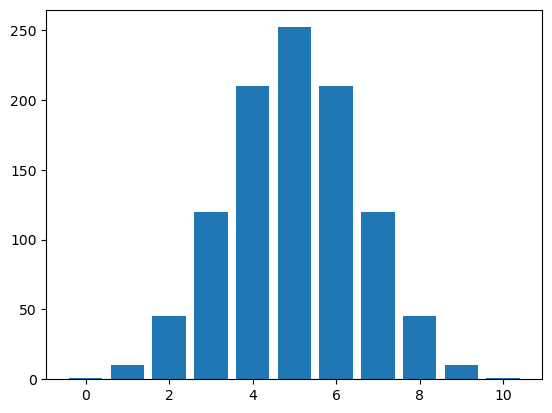

In [14]:
import matplotlib.pyplot as plt

coins = 10

x = list(range(coins + 1))

y = [math.comb(coins, i) for i in x]

plt.bar(x, y);

## Testing numpy

***

Finally, lets ask ourselves whether or not we can trust numpy.

How about we run 10,000 trials and keep track of the number of heads for each, and plot that?

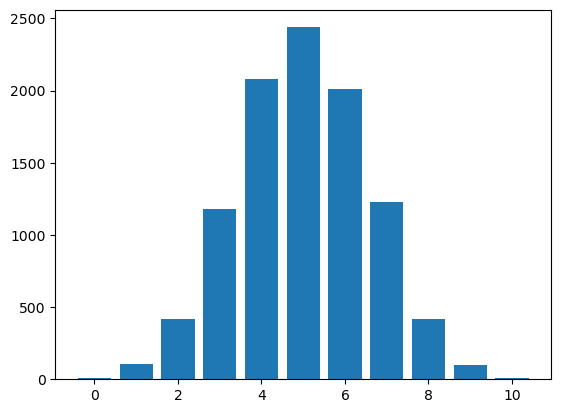

In [15]:
coins = 10

trials = 10000

heads = np.random.binomial(coins, 0.5, trials)

vals, counts = np.unique(heads, return_counts=True)

plt.bar(vals, counts);

The plots look the same.

Is there a test we can do to really convince ourselves?

Some sort of statistical test?

That's for another day.

***

## End